<a href="https://colab.research.google.com/github/christianalencar/challengedados2ed/blob/main/CDS_2ed_Novexus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre o desafio

"Novexus, uma empresa de telecomunicações líder no mercado, está comprometida em reter seus clientes. Para isso, contratou uma equipe de cientistas de dados para identificar os clientes com maior propensão a abandoná-la.

A primeira etapa do projeto será a limpeza e análise exploratória dos dados, para identificar padrões e tendências que podem ajudar a identificar esses clientes. Após essa fase, os cientistas de dados desenvolverão modelos de classificação para identificar os clientes com maior probabilidade de cancelar os serviços.

Ao identificar esses clientes, a Novexus poderá tomar medidas para retê-los."

# Baixando o banco de dados

In [ ]:
# Biblioteca a serem usadas

import pandas as pd
from pandas import json_normalize
import numpy as np
import json
import os
from google.colab import drive

In [ ]:
# Carregar os dados a partir do arquivo JSON

with open('/content/drive/MyDrive/Alura/dados/Telco-Customer-Churn.json') as json_file:
    data = json.load(json_file)

# Transformar os dados em um DataFrame do Pandas

df = pd.json_normalize(data)

In [ ]:
# Visualizar as primeiras linhas do DataFrame
df.head()

# Valores únicos e análise da tipagem dos dados

In [ ]:
def valores_unicos_e_tipagem(df):
    for col in df.columns:
        if df[col].nunique() > 4:
            print(f'# Coluna {df[col].dtypes}: {col} - Existem {df[col].nunique()}/{len(df[col])} valores únicos')
        else:
            print(f'# Coluna {df[col].dtypes}: {col}', df[col].unique())

valores_unicos_e_tipagem(df)

# Coluna object: customerID - Existem 7267/7267 valores únicos
# Coluna object: Churn ['No' 'Yes' '']
# Coluna object: customer.gender ['Female' 'Male']
# Coluna int64: customer.SeniorCitizen [0 1]
# Coluna object: customer.Partner ['Yes' 'No']
# Coluna object: customer.Dependents ['Yes' 'No']
# Coluna int64: customer.tenure - Existem 73/7267 valores únicos
# Coluna object: phone.PhoneService ['Yes' 'No']
# Coluna object: phone.MultipleLines ['No' 'Yes' 'No phone service']
# Coluna object: internet.InternetService ['DSL' 'Fiber optic' 'No']
# Coluna object: internet.OnlineSecurity ['No' 'Yes' 'No internet service']
# Coluna object: internet.OnlineBackup ['Yes' 'No' 'No internet service']
# Coluna object: internet.DeviceProtection ['No' 'Yes' 'No internet service']
# Coluna object: internet.TechSupport ['Yes' 'No' 'No internet service']
# Coluna object: internet.StreamingTV ['Yes' 'No' 'No internet service']
# Coluna object: internet.StreamingMovies ['No' 'Yes' 'No internet service']
# 

### **Analise Preliminar**

* Temos um total de 7267 clientes na base de dados;
* Se observa uma quantidade de valores faltantes na coluna focal de Churn que precisa ser avaliada para resolver a questão.

In [ ]:
#Viisualizar as colunas categoricas.
df.describe(include='object')

,customerID,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Total
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,0002-ORFBO,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


In [ ]:
# Quantos dados estão nulos na coluna alvo (Churn)

n_faltantes = df[df['Churn'] == ''].shape[0]
porcentagem_n_faltantes = round((n_faltantes / len(df)) * 100, 2)

f'Existem um total de {n_faltantes} dados faltantes na coluna Churn. Isso representa {porcentagem_n_faltantes}% do total de clientes.'

'Existem um total de 224 dados faltantes na coluna Churn. Isso representa 3.08% do total de clientes.'

In [ ]:
# Vamos analisar a coluna Charges.Total e transformá-la para valores numéricos:

list(df['account.Charges.Total'].head())

['593.3', '542.4', '280.85', '1237.85', '267.4']

In [ ]:
# Existem dados(df) faltantes, por isso errors = 'coerce'

df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors = 'coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

# Procurando incosistências nos dados, foco a coluna Churn


# Corrigir as inconsistências nos dados

In [ ]:
df_completos = df.copy().loc[~(df['Churn'] == '')].reset_index(drop = True)

In [ ]:
df_completos[df_completos['account.Charges.Total'].isnull()][['customer.tenure',
                                                              'account.Contract',
                                                              'account.Charges.Monthly',
                                                              'account.Charges.Total']]

,customer.tenure,account.Contract,account.Charges.Monthly,account.Charges.Total
945,0,Two year,56.05,NaN
1731,0,Two year,20.00,NaN
1906,0,Two year,61.90,NaN
2025,0,One year,19.70,NaN
2176,0,Two year,20.25,NaN
2250,0,Two year,25.35,NaN
2855,0,Two year,73.35,NaN
3052,0,Two year,25.75,NaN
3118,0,Two year,52.55,NaN
4054,0,Two year,80.85,NaN


In [ ]:
indice_dados_faltantes = df_completos[
    df_completos['account.Charges.Total'].isnull()].index


def gasto_total(linha):
    if linha['account.Contract'] == 'Two year':
        linha['account.Charges.Total'] = linha['account.Charges.Monthly'] * 24
        linha['customer.tenure'] = 24
    else:
        linha['account.Charges.Total'] = linha['account.Charges.Monthly'] * 12
        linha['customer.tenure'] = 12
    return linha


dados_clean = df_completos.copy()
dados_clean.loc[indice_dados_faltantes] = dados_clean.loc[
    indice_dados_faltantes].apply(gasto_total, axis=1)

# Visualização gráfica

In [ ]:
# Paleta de Cores a ser usado no gráfico

paleta_cores = ['#1E1E2E', '#48A24E', '#FF7F50', '#E53935', '#9B59B6']

In [ ]:
# Bibliotecas para gerar gráficos para analises visual

import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

In [ ]:
# Visualizar a distribuição de frequência de diferentes grupos em um conjunto de dados

def plot_countplots(data, coluna_hue, grupos, figsize=(12, 8)):
    num_grupos = len(grupos)
    cols = 2
    linhas = int(np.ceil(num_grupos / cols))

    fig, axes = plt.subplots(nrows=linhas, ncols=cols, figsize=figsize)
    axes = axes.flatten()  # Transforma a matriz de eixos em uma matriz 1D

    for i, grupo in enumerate(grupos):
        if i < num_grupos:
            eixo = axes[i]  # Acessa o eixo diretamente da matriz 1D
            sns.countplot(x=grupo,
                          data=data,
                          hue=coluna_hue,
                          palette=paleta_cores,
                          alpha=0.8,
                          ax=eixo)
            sns.despine(right=True, top=True)
            eixo.legend([], [], frameon=False)
            eixo.set_xlabel(grupo.split('.')[-1])
            eixo.set_ylabel('Frequência')

    # Remove quaisquer subplots vazios adicionais

    for i in range(num_grupos, linhas * cols):
        fig.delaxes(axes[i])

    # Cria uma legenda fora dos subplots

    handles, labels = eixo.get_legend_handles_labels()
    legenda = fig.legend(handles,
                         labels,
                         loc='upper center',
                         bbox_to_anchor=(0.5, 1.13),
                         ncol=2)
    legenda.set_title('Churn')

    plt.tight_layout()

In [ ]:
# Criando base para analise estatistica

def adicionar_estatisticas(ax, dados, metrica, texto_y, cor):
    valores_estatisticos = dados.groupby('Churn')[metrica].agg(['mean', 'median', 'min', 'max'])

    texto = f'Média: {valores_estatisticos["mean"][0]:.2f} | {valores_estatisticos["mean"][1]:.2f}\n'
    texto += f'Mediana: {valores_estatisticos["median"][0]:.2f} | {valores_estatisticos["median"][1]:.2f}\n'
    texto += f'Mínimo: {valores_estatisticos["min"][0]:.2f} | {valores_estatisticos["min"][1]:.2f}\n'
    texto += f'Máximo: {valores_estatisticos["max"][0]:.2f} | {valores_estatisticos["max"][1]:.2f}'

    ax.text(0.5, texto_y, texto, transform=ax.transAxes, fontsize=12, color=cor, ha='center')

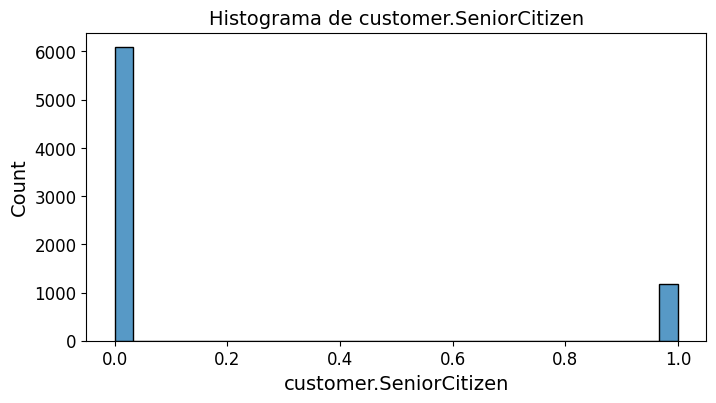

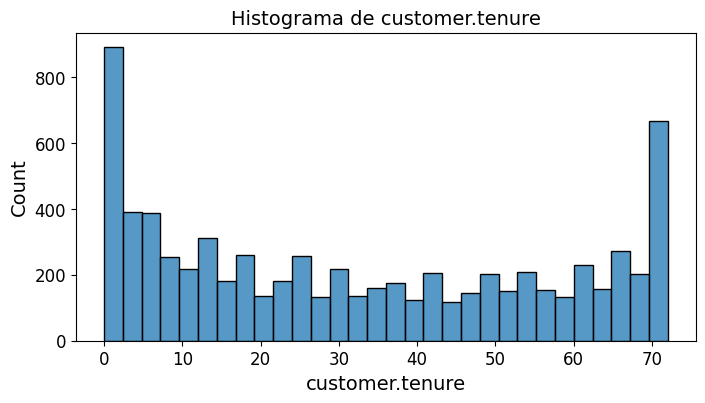

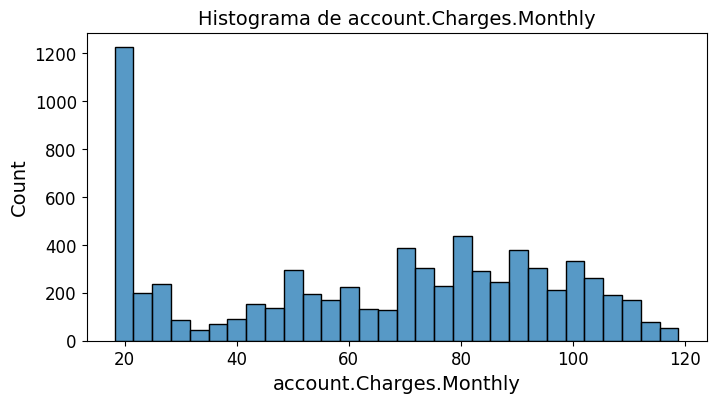

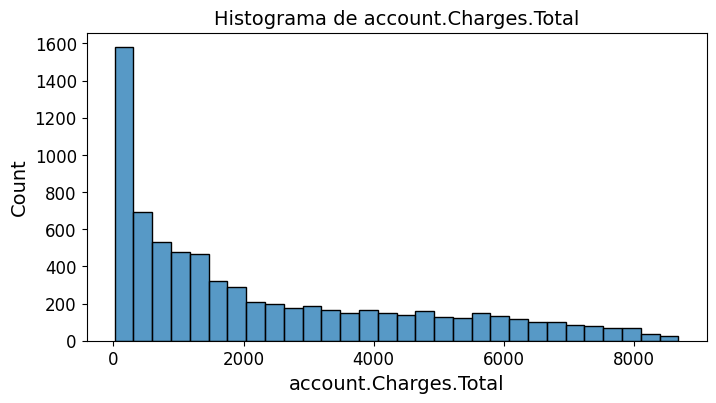

In [ ]:
# Histogramas

num_columns = df_completos.select_dtypes(include=['int64', 'float64']).columns

for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, bins=30)
    plt.title(f'Histograma de {col}')
    plt.show()

##  Visualizando a coluna Churn

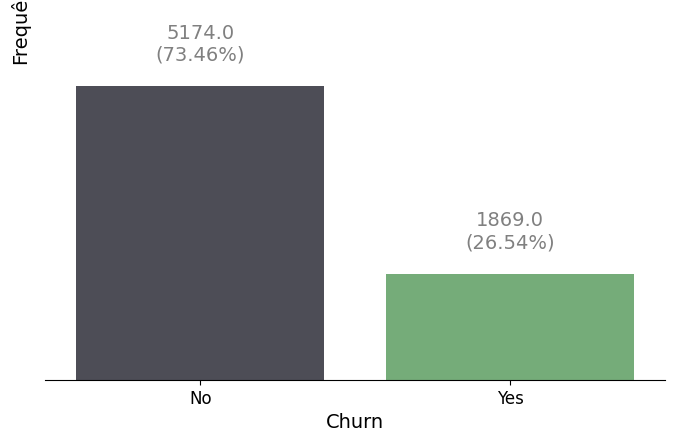

In [ ]:
plt.figure(figsize=(8, 4))

ax = sns.countplot(x='Churn', data = dados_clean, palette=paleta_cores, alpha=.8)


sns.despine(right=True, top=True, left=True)
ax.set(ylabel=None)
ax.tick_params(left=False)
ax.set(yticklabels=[])

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{y}\n({y/len(dados_clean)*100:.2f}%)\n', (x, y),
                ha='center', va='bottom', color='gray')

plt.ylabel('Frequência', y = 1.2)
plt.show()

In [ ]:
# Contagem de valores de Churn
contagem_churn = dados_clean['Churn'].value_counts()
contagem_churn

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
# Valores em percentual de Churn
dados_clean['Churn'].value_counts(normalize=True).mul(100).round(2).astype(str) + ' %'


No     73.46 %
Yes    26.54 %
Name: Churn, dtype: object

**Análise preliminar**: Observamos que a maioria esmagadora de nossos clientes, cerca de 73,46%, optou por não cancelar nossos serviços, enquanto apenas 26,54% cancelaram. Desta forma temos um desequilíbrio nos dados, o que significa que qualquer análise ou previsão que fizermos tende a favorecer os clientes que continuam conosco

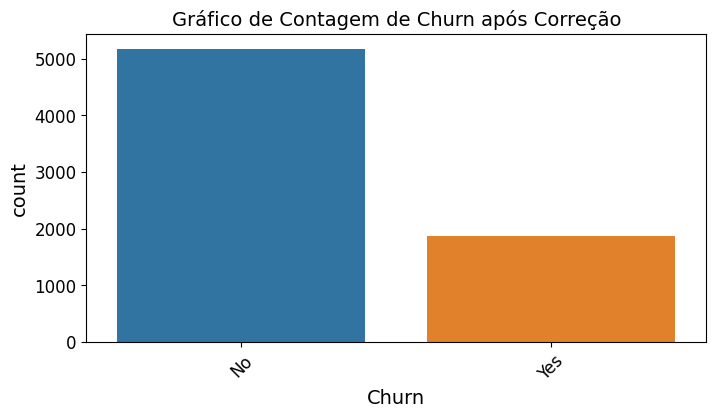

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [ ]:
# Substituir os valores vazios na coluna 'Churn' por um valor padrão (por exemplo, 'Unknown')
df_completos['Churn'].replace('', 'Unknown', inplace=True)

# Gráficos de contagem após correção
plt.figure(figsize=(8, 4))
sns.countplot(data = df_completos, x='Churn')
plt.title('Gráfico de Contagem de Churn após Correção')
plt.xticks(rotation=45)
plt.show()

# Exibir as primeiras linhas do DataFrame após correção
df_completos.head()

In [ ]:
# Contagem de homens e mulheres
contagem_genero = df_completos['customer.gender'].value_counts()

# Exibir a contagem
contagem_genero

Male      3555
Female    3488
Name: customer.gender, dtype: int64

## Quantidade de churn por gênero

In [ ]:
# Converter valores 'No' e 'Yes' da coluna 'Churn' para 0 e 1
df_completos['Churn'] = df_completos['Churn'].replace({'No': 0, 'Yes': 1})

# Calcular a quantidade de churn por gênero
quantidade_churn_por_genero = df_completos.groupby('customer.gender')['Churn'].sum()

print(quantidade_churn_por_genero)

customer.gender
Female    939
Male      930
Name: Churn, dtype: int64


Análise preliminar: A divisão entre homens e mulheres é próxima, com 930 e 939 cancelamentos, respectivamente. No entanto, é preciso analisar mais dados, como idade, localização e histórico de uso da internet, para ter uma compreensão mais profunda dessa diferença.

## Verificação das características categóricas (também conhecidas como variáveis categóricas ou atributos categóricos) e a variável de resposta "Churn"

**Informações das características dos CLIENTES em base ao Churn**

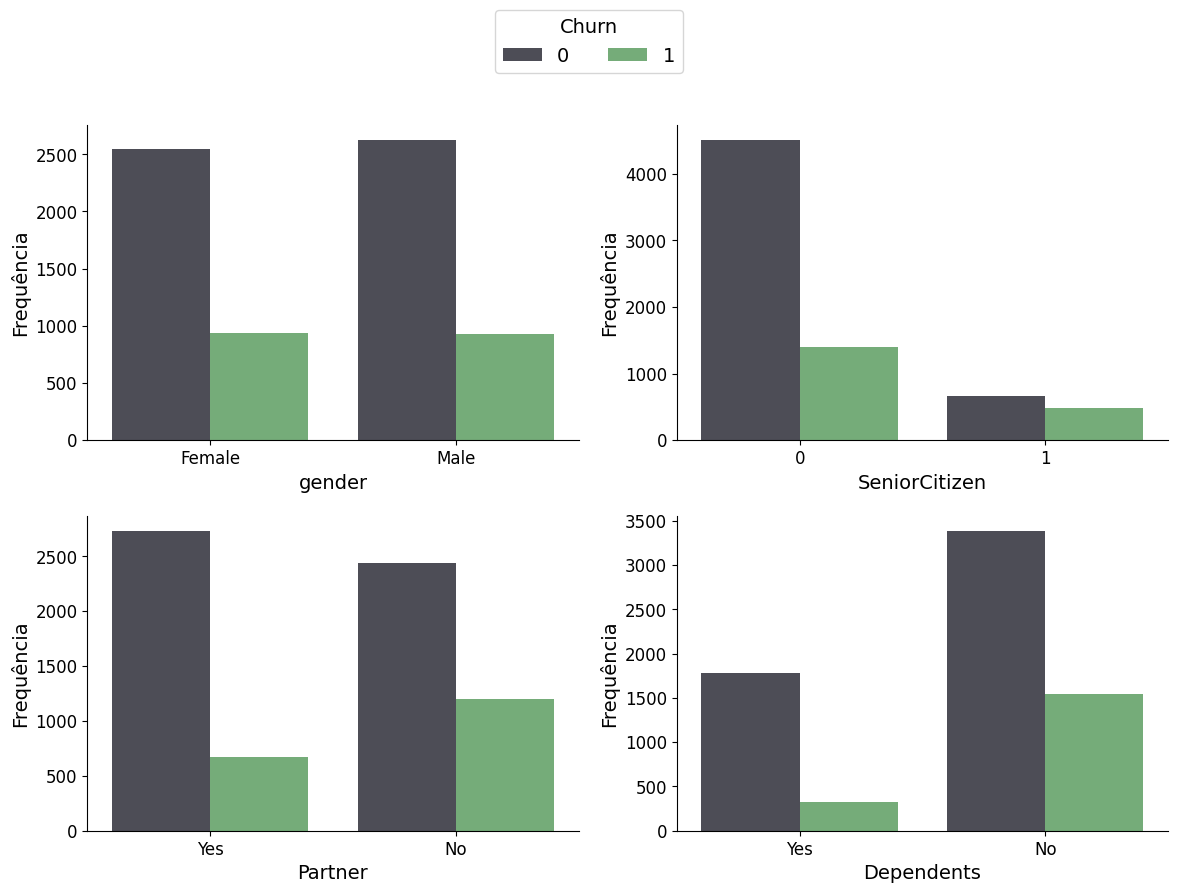

In [ ]:
# Criando primeiro conjunto de gráficos
grupo_1 = dados_clean.filter(like='customer').columns.tolist()[1:-1]

# Exibindo Gráfico
plot_countplots(df_completos, 'Churn', grupo_1)

**Análise preliminar** :

- A taxa de cancelamento é praticamente igual para homens e mulheres;
- O número de clientes idosos é baixo;
- Os clientes com parceiros têm menos probabilidade de cancelar;
- Os clientes sem dependentes têm uma taxa de cancelamento maior.

**Informações das características dos SERVIÇOS TELEFÔNICOS em base ao Churn**

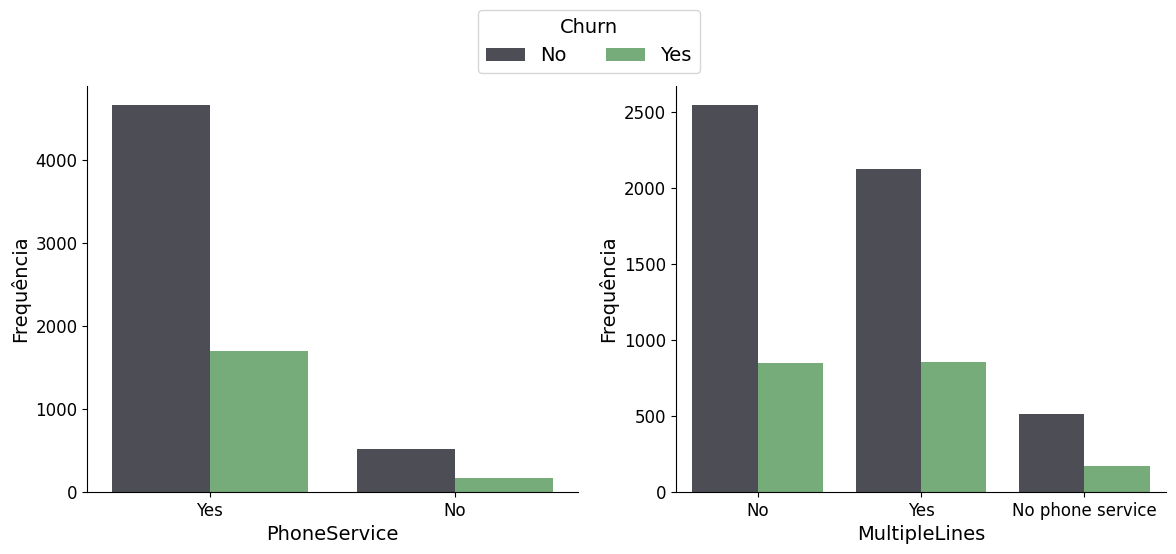

In [ ]:
# Criando segundo conjunto de gráficos
grupo_2 = dados_clean.filter(like='phone').columns.tolist()

# Exibindo o gráfico
plot_countplots(dados_clean, 'Churn', grupo_2, figsize=(12, 5))

**Análise preliminar**: A taxa de retenção de clientes para o serviço de telefone é maior do que a taxa de cancelamento, mesmo para clientes sem serviço telefônico. A taxa de cancelamento é a mesma para clientes com uma ou várias linhas.

## Informações das características dos SERVIÇOS DE INTERNET

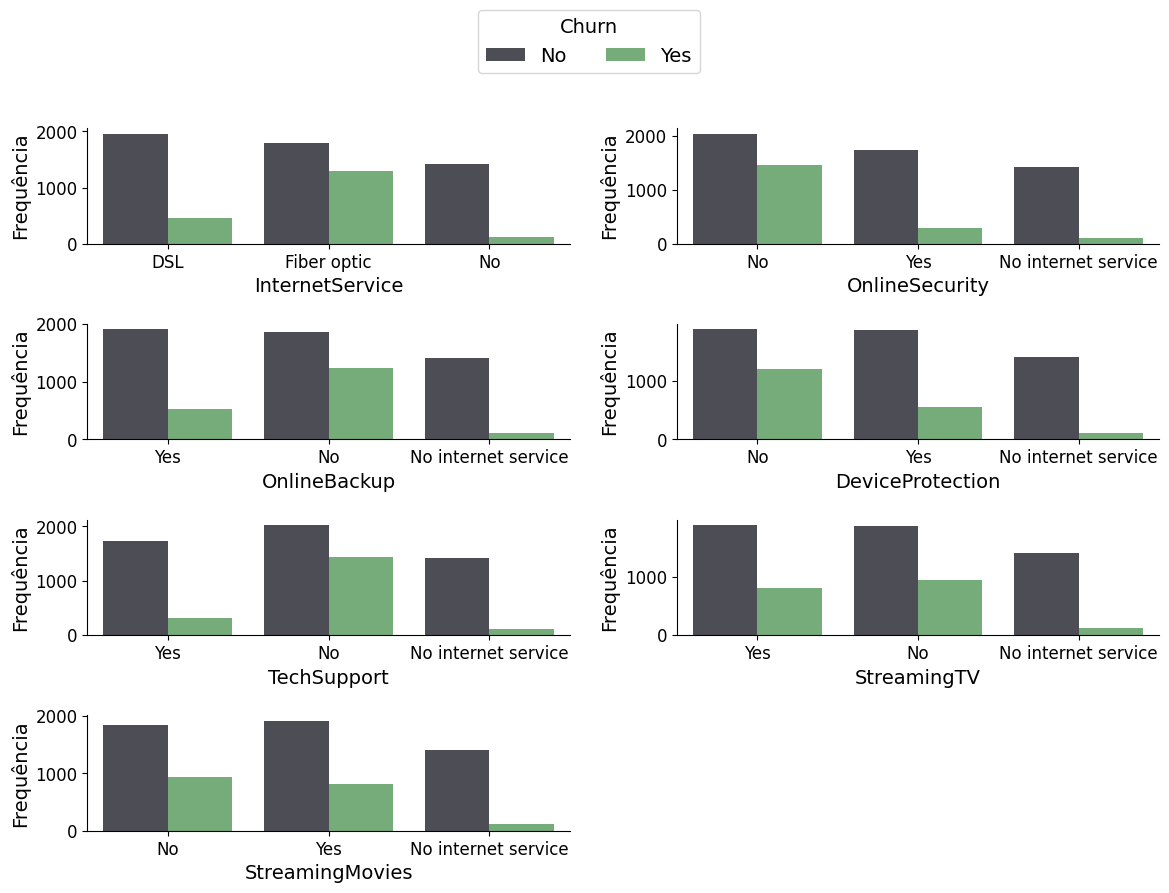

In [ ]:
# Criando segundo conjunto de gráficos
grupo_3 = dados_clean.filter(like='internet').columns.tolist()

# Exibindo o gráfico
plot_countplots(dados_clean, 'Churn', grupo_3, figsize=(12, 8))

**Análise preliminar** : Os clientes mostraram uma preferência por serviços de internet via DSL, com um número menor de clientes optando por cabos de fibra ótica. As taxas de cancelamento de streaming de TV e streaming de filmes foram semelhantes, sugerindo que outros fatores, como preços ou qualidade do serviço, podem ter sido responsáveis por essas decisões.

Os serviços de segurança online, backup online, proteção de dispositivos e suporte técnico desempenham um papel fundamental na satisfação dos clientes. Uma quantidade significativa de clientes que não possuíam esses serviços decidiu deixar a Novexus.

## Informações das características dos Financeiros dos Clientes

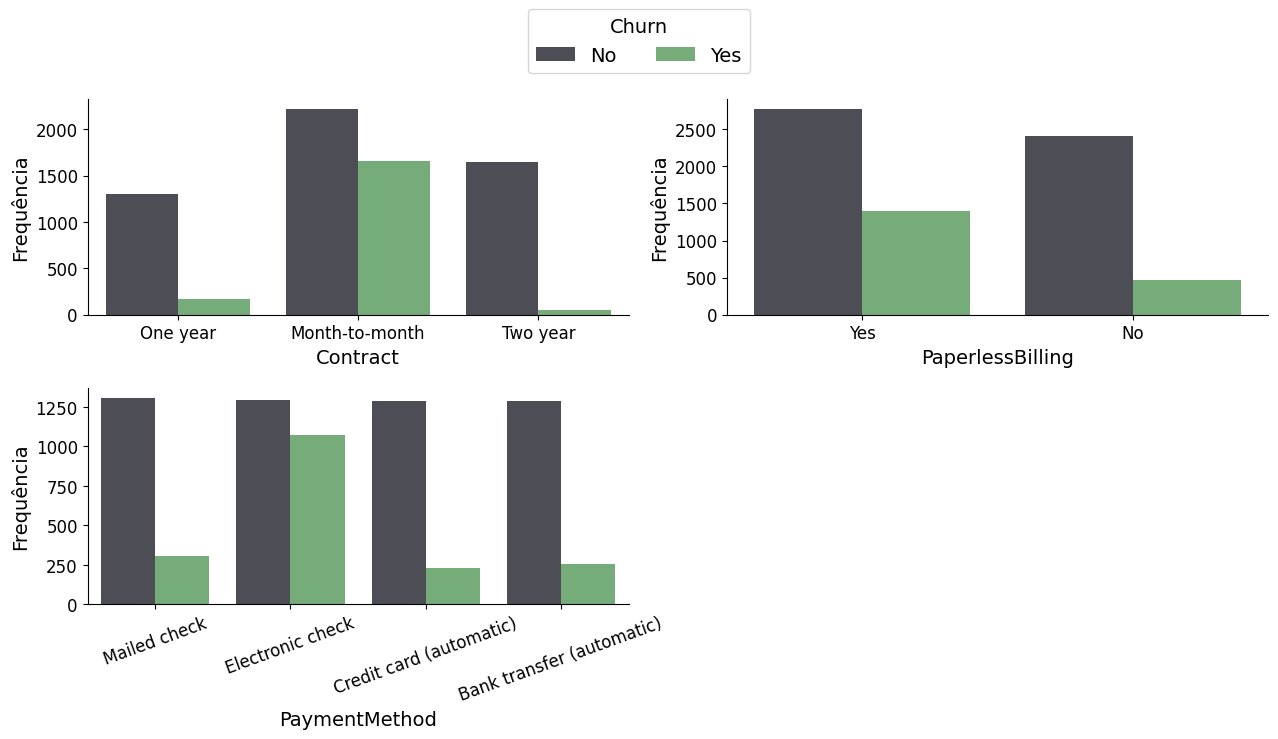

In [ ]:
# Criando segundo conjunto de gráficos

grupo_4 = dados_clean.filter(like='account').columns.tolist()[:-2]

# Gerando os gráficos

plot_countplots(dados_clean, 'Churn', grupo_4, figsize=(13, 6))
plt.xticks(rotation=20)
plt.show()

**Análise preliminar** : Os contratos mensais têm uma alta taxa de cancelamento, provavelmente devido a clientes experimentando diferentes serviços, qualidade inconsistente ou problemas de pagamento com cheque eletrônico. A empresa precisa reconsiderar o uso do cheque eletrônico ou eliminá-lo

## Feature numéricas

In [ ]:
features_num = dados_clean.select_dtypes(exclude=['object']).iloc[:, 1:]  # Excluindo o SeniorCitizen
features_num.head()

,customer.tenure,account.Charges.Monthly,account.Charges.Total
0,9,65.6,593.30
1,9,59.9,542.40
2,4,73.9,280.85
3,13,98.0,1237.85
4,3,83.9,267.40


<Figure size 640x480 with 0 Axes>

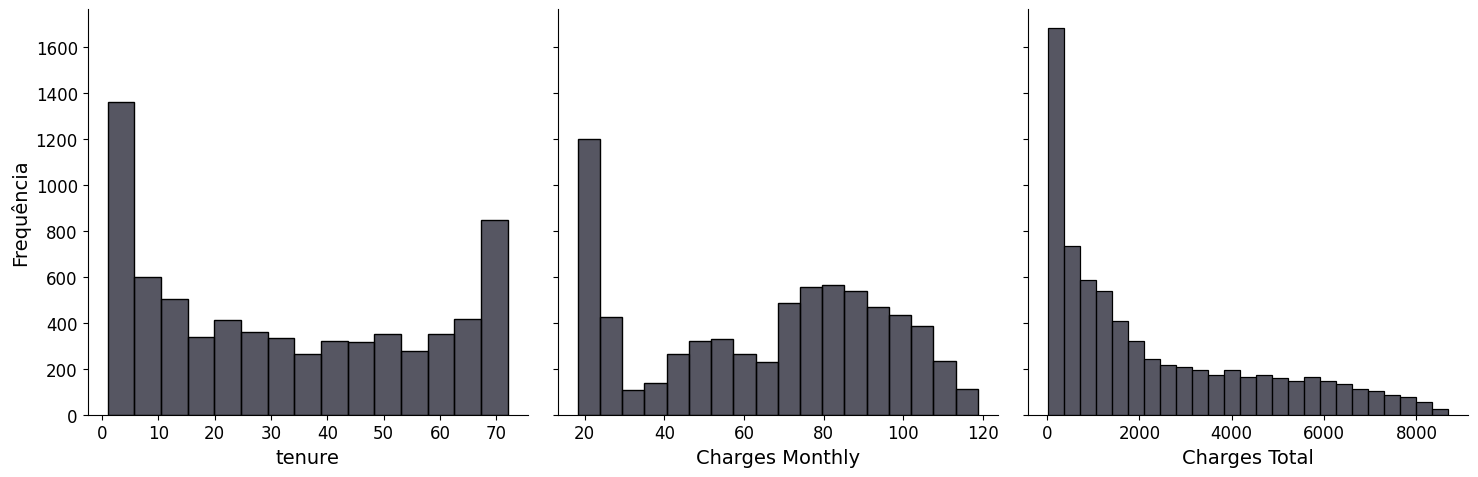

In [ ]:
# Adicione um título ao gráfico
plt.suptitle("Distribuição das Features Numéricas", fontsize=16)

fig, axes = plt.subplots(1, len(features_num.columns), figsize=(15, 5), sharey=True)

for i, col in enumerate(features_num.columns):
    sns.histplot(dados_clean[col], ax=axes[i], color=paleta_cores[0], kde=False)
    sns.despine(right=True, top=True)
    col_name = ' '.join(col.split('.')[1:])
    axes[i].set_xlabel(col_name)
    axes[i].set_ylabel('Frequência')

    # Adicione rótulos nos eixos
    axes[i].set_xlabel(col_name)
    axes[i].set_ylabel('Frequência')

# Ajuste os limites dos eixos, se necessário
# plt.xlim(xmin, xmax)
# plt.ylim(ymin, ymax)

# Adicione uma legenda, se necessário
# plt.legend(labels=['Label1', 'Label2', ...])

# Personalize as barras ou linhas, se necessário
# axes[i].plot(..., linewidth=2, linestyle='-', alpha=0.7)

# Adicione anotações, se necessário
# axes[i].annotate('Anotação', xy=(x, y), xytext=(x_text, y_text),
#                  arrowprops=dict(arrowstyle='->', lw=1.5))

plt.tight_layout()
plt.show()

# Boxplot para as variáveis numéricas

In [ ]:
dados_clean.select_dtypes(exclude = ['object']).head()

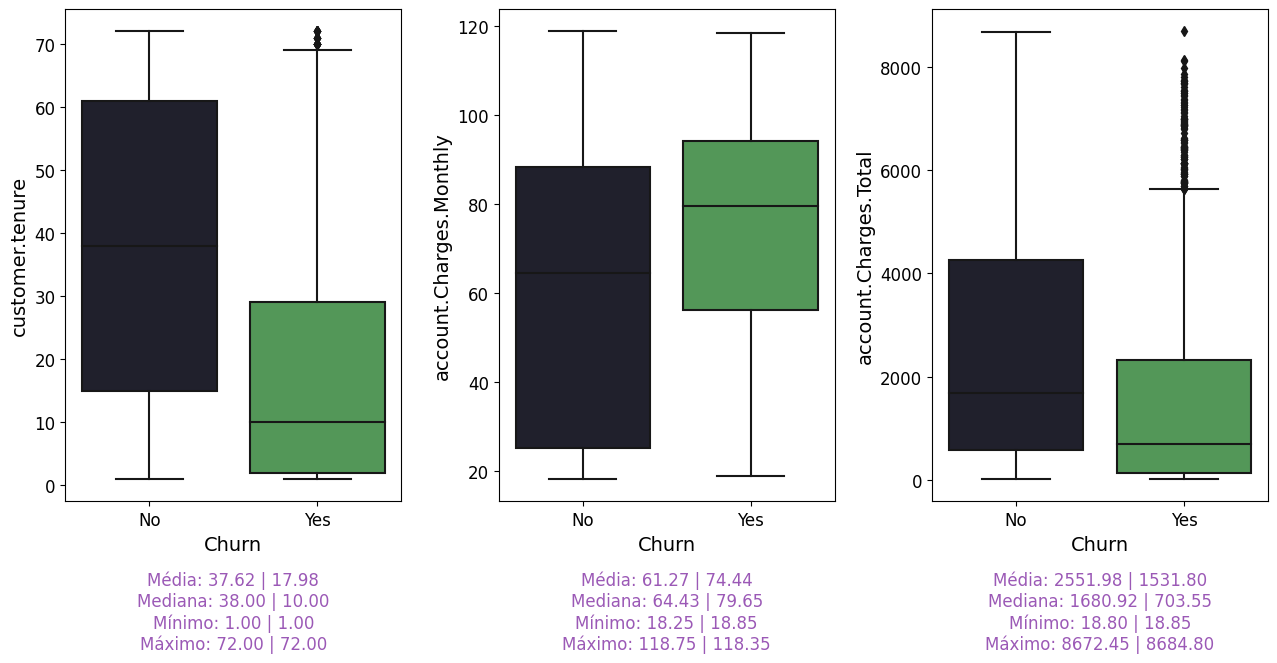

In [ ]:
fig, axes = plt.subplots(1, len(features_num.columns), figsize=(13, 7))

for i, col in enumerate(features_num.columns):
    boxplot = sns.boxplot(x='Churn', y=col, data=dados_clean, ax=axes[i], palette=paleta_cores)
    for patch in boxplot.artists:
        patch.set_alpha(.8)
    col_name = ' '.join(col.split('.')[1:])

    mediana = dados_clean.groupby('Churn')[col].median()
    media = dados_clean.groupby('Churn')[col].mean()
    minimo = dados_clean.groupby('Churn')[col].min()
    maximo = dados_clean.groupby('Churn')[col].max()

    adicionar_estatisticas(axes[i], dados_clean, col, -0.3, paleta_cores[-1])

plt.tight_layout()
plt.show()

**Análise preliminar** : Os clientes que permaneceram com a empresa tiveram, em média, contratos mais longos do que os que cancelaram. Por outro lado, os clientes que cancelaram tiveram, em média, gastos mensais mais elevados do que os que permaneceram. Isso pode ser devido a uma variedade de fatores, como diferentes tipos de serviços utilizados ou problemas de satisfação com a empresa.

Os clientes que cancelaram tiveram, em média, gastos totais mais baixos do que os que permaneceram. Isso sugere que, embora os clientes com despesas mais elevadas possam ser mais propensos a cancelar, eles podem não representar maior valor a longo prazo para a empresa

##Binarização dos dados categóricos

**Significado :**
Binarização de dados categóricos é o processo de converter dados categóricos em dados binários. Isso é feito atribuindo um valor de 1 a uma categoria e um valor de 0 a outra categoria. Por exemplo, um dado categórico que pode assumir os valores "Sim" ou "Não" pode ser binarizado atribuindo 1 a "Sim" e 0 a "Não".

A binarização de dados categóricos é útil em muitos casos, como:

- Quando os dados categóricos precisam ser usados em um algoritmo de aprendizado de máquina que só pode lidar com dados binários;
- Quando os dados categóricos precisam ser reduzidos para um conjunto de dados menor e mais fácil de gerenciar;
- Quando os dados categóricos precisam ser comparados entre si.

In [ ]:
dados_clean.select_dtypes(exclude = ['int', 'float']).columns

In [ ]:
# Removendo a coluna 'customerID' que não tem relevancia para analise
dados_bin = dados_clean.drop('customerID', axis = 1).copy()

In [ ]:
def func_aux(row):
    no_phone_service = 1 if 'No phone service' in row.values else 0
    no_internet_service = 1 if 'No internet service' in row.values else 0
    return pd.Series({'NoPhoneService': no_phone_service, 'NoInternetService': no_internet_service})

def descrever_colunas(dados):
    """
    Esta função recebe um DataFrame e exibe informações resumidas sobre suas
    colunas, incluindo o tipo de dados e, se houver mais de 4 valores únicos,
    a contagem de valores únicos.

    Parâmetros:
    - dados (pd.DataFrame): O DataFrame contendo os dados a serem inspecionados.
    """
    for col in dados.columns:
        tipo_de_dados = dados[col].dtype
        num_valores_unicos = dados[col].nunique()
        descricao = f'Coluna {col}: {tipo_de_dados}, '

        if num_valores_unicos > 4:
            descricao += f'{num_valores_unicos}/{len(dados)} valores únicos'
        else:
            valores_unicos = ', '.join(map(str, dados[col].unique()))
            descricao += f'Valores Únicos: {valores_unicos}'

        print(descricao)

def descrever_dados_faltantes(dados, coluna):
    """
    Esta função recebe um DataFrame e o nome de uma coluna e exibe informações
    sobre os dados faltantes nessa coluna.

    Parâmetros:
    - dados (pd.DataFrame): O DataFrame contendo os dados a serem inspecionados.
    - coluna (str): O nome da coluna a ser analisada.
    """
    dados_faltantes = dados[coluna].isnull().sum()
    porcentagem_faltantes = round((dados_faltantes / len(dados)) * 100, 2)
    descricao = f'Dados faltantes na coluna {coluna}: {dados_faltantes}. '
    descricao += f'Isso representa {porcentagem_faltantes}% do total.'
    print(descricao)

def preprocessamento_binarizacao(df, colunas_sim_nao, colunas_multiclasses, colunas_mistas):
    """
    Realiza o pré-processamento de um DataFrame, convertendo colunas categóricas
    em formatos binários ou one-hot encoding.

    Parâmetros:
    - df (pd.DataFrame): O DataFrame que contém os dados a serem pré-processados.
    - colunas_sim_nao (list): Uma lista de nomes de colunas que contêm valores
    'Yes' e 'No' a serem binarizados (0 ou 1).
    - colunas_multiclasses (list): Uma lista de nomes de colunas com categorias
    múltiplas a serem transformadas em one-hot encoding.
    - colunas_mistas (list): Uma lista de nomes de colunas que podem conter
    valores 'Yes', 'No', 'No internet service' e 'No phone service'.

    Retorna:
    - pd.DataFrame: O DataFrame pré-processado com as colunas convertidas.
    """
    # Binariza colunas com valores 'Yes' e 'No'
    df[colunas_sim_nao] = df[colunas_sim_nao].replace({'Yes': 1, 'No': 0})

    # Converte a coluna 'customer.gender' em binário (Female: 1, Male: 0)
    df['customer.gender'] = df['customer.gender'].replace({'Female': 1, 'Male': 0})

    # Realiza one-hot encoding nas colunas de multiclasses
    df = pd.get_dummies(df, columns=colunas_multiclasses, dtype=int)

    # Aplica a função de criação de colunas de serviço
    colunas_sem_servico = df[colunas_mistas].apply(func_aux, axis=1)

    # Binariza colunas mistas
    df[colunas_mistas] = df[colunas_mistas].replace({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})

    # Concatena as colunas de serviço ao DataFrame
    return pd.concat([df, colunas_sem_servico], axis=1)


In [ ]:
# Colunas definidas conforme o novo código
colunas_sim_nao = ['Churn', 'customer.Partner', 'customer.Dependents',
                   'phone.PhoneService', 'account.PaperlessBilling']

colunas_multiclasses = ['internet.InternetService', 'account.Contract',
                        'account.PaymentMethod']

colunas_mistas = ['phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup',
                  'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV',
                  'internet.StreamingMovies']

# Realiza o pré-processamento dos dados
dados_func = preprocessamento_binarizacao(dados_bin, colunas_sim_nao,
                                         colunas_multiclasses, colunas_mistas).copy()

In [ ]:
# removendo coluna sem_servico_internet
dados_noserv = dados_func.drop(columns = sem_servico_internet[0]).copy()

In [ ]:
sem_servico_internet = ['internet.InternetService_No', 'NoInternetService']
set(list(dados_func[sem_servico_internet].itertuples(index=False, name=None)))

{(0, 0), (1, 1)}

In [ ]:
sem_servico_telefone = ['phone.PhoneService', 'NoPhoneService']
set(list(dados_func[sem_servico_telefone].itertuples(index=False, name=None)))

{(0, 1), (1, 0)}

In [ ]:
# removendo coluna sem_servico_telefone

dados_notele = dados_noserv.drop(columns = sem_servico_telefone[0]).copy()

In [ ]:
# Chamando a função para descrever as colunas do DataFrame dados_notele
descrever_colunas(dados_notele)

Coluna Churn: int64, Valores Únicos: 0, 1
Coluna customer.gender: int64, Valores Únicos: 1, 0
Coluna customer.SeniorCitizen: int64, Valores Únicos: 0, 1
Coluna customer.Partner: int64, Valores Únicos: 1, 0
Coluna customer.Dependents: int64, Valores Únicos: 1, 0
Coluna customer.tenure: int64, 72/7043 valores únicos
Coluna phone.MultipleLines: int64, Valores Únicos: 0, 1
Coluna internet.OnlineSecurity: int64, Valores Únicos: 0, 1
Coluna internet.OnlineBackup: int64, Valores Únicos: 1, 0
Coluna internet.DeviceProtection: int64, Valores Únicos: 0, 1
Coluna internet.TechSupport: int64, Valores Únicos: 1, 0
Coluna internet.StreamingTV: int64, Valores Únicos: 1, 0
Coluna internet.StreamingMovies: int64, Valores Únicos: 0, 1
Coluna account.PaperlessBilling: int64, Valores Únicos: 1, 0
Coluna account.Charges.Monthly: float64, 1585/7043 valores únicos
Coluna account.Charges.Total: float64, 6541/7043 valores únicos
Coluna internet.InternetService_DSL: int64, Valores Únicos: 1, 0
Coluna internet.I

## Relacionamento entre os recursos(Features) e o alvo (churn)

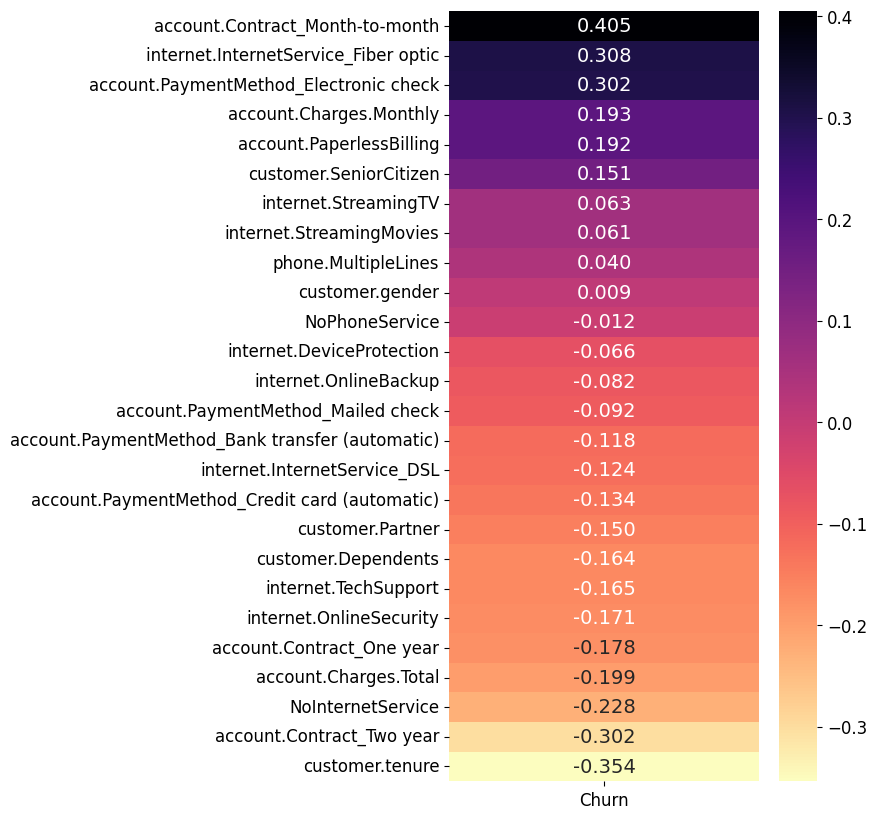

In [ ]:
# Calcula a correlação entre as colunas de dados_notele e 'Churn'
corr = dados_notele.corrwith(dados_notele['Churn']).sort_values(ascending=False)[1:].to_frame('Churn')

# Plota o heatmap
plt.figure(figsize=(5, 10))
sns.heatmap(corr, annot=True, cmap='magma_r', fmt='.3f')
plt.show()

**Retenção de clientes: análise de correlação**

- A coluna Churn foi removida da análise, pois possui uma correlação de 1 consigo mesma. Isso ocorre porque Churn é a variável que indica se o cliente cancelou o serviço ou não. Portanto, não há como ela correlacionar-se com outras variáveis, pois ela é a definição de cancelamento;

- A correlação mais forte e positiva é com contrato_mensal. Isso indica que os clientes com contratos mensais têm uma probabilidade significativamente maior de cancelar seus serviços em comparação com aqueles que têm contratos anuais ou bienais;

- Os clientes que utilizam o serviço de fibra ótica também apresentam uma correlação positiva, sugerindo que eles são mais propensos a cancelar em comparação com os clientes que utilizam outros tipos de conexão à Internet. Isso também se aplica ao pagamento_eletrônico;

- A correlação para despesas_mensais é positiva, mas sua força é menor em comparação com as três primeiras variáveis. Isso sugere que clientes com mensalidades mais altas podem ter uma probabilidade ligeiramente maior de cancelar, mas essa relação não é tão marcante quanto outros fatores;

- A variável customer.tenure apresenta a correlação negativa mais forte. Quanto mais tempo um cliente permanece com a empresa, menor é a probabilidade de cancelamento. Isso também é coerente quando observamos a segunda variável mais negativa, NoInternetService;

- A correlação negativa com a variável NoInternetService sugere que os clientes que não têm serviço de Internet são menos propensos a cancelar;

- Os clientes com dependentes também exibem uma correlação negativa, indicando que são menos propensos a cancelar em comparação com aqueles sem dependentes.

**Conclusão**

Os resultados da análise de correlação sugerem que fatores como a duração do contrato, a presença de serviços adicionais (como segurança na Internet e suporte técnico), métodos de pagamento eletrônico e a utilização de fibra ótica podem desempenhar um papel fundamental na retenção de clientes.

**Recomendações :**

Com base nos resultados da análise, as seguintes recomendações podem ser feitas para melhorar a retenção de clientes:

- Oferecer contratos anuais ou bienais para incentivar a fidelidade dos clientes;
- Investir em serviços adicionais para melhorar a experiência do cliente.
Oferecer opções de pagamento alternativas para atender às necessidades dos clientes;
- Desenvolver um plano de marketing específico para clientes que utilizam fibra ótica;
- Oferecer descontos ou benefícios para clientes com dependentes.

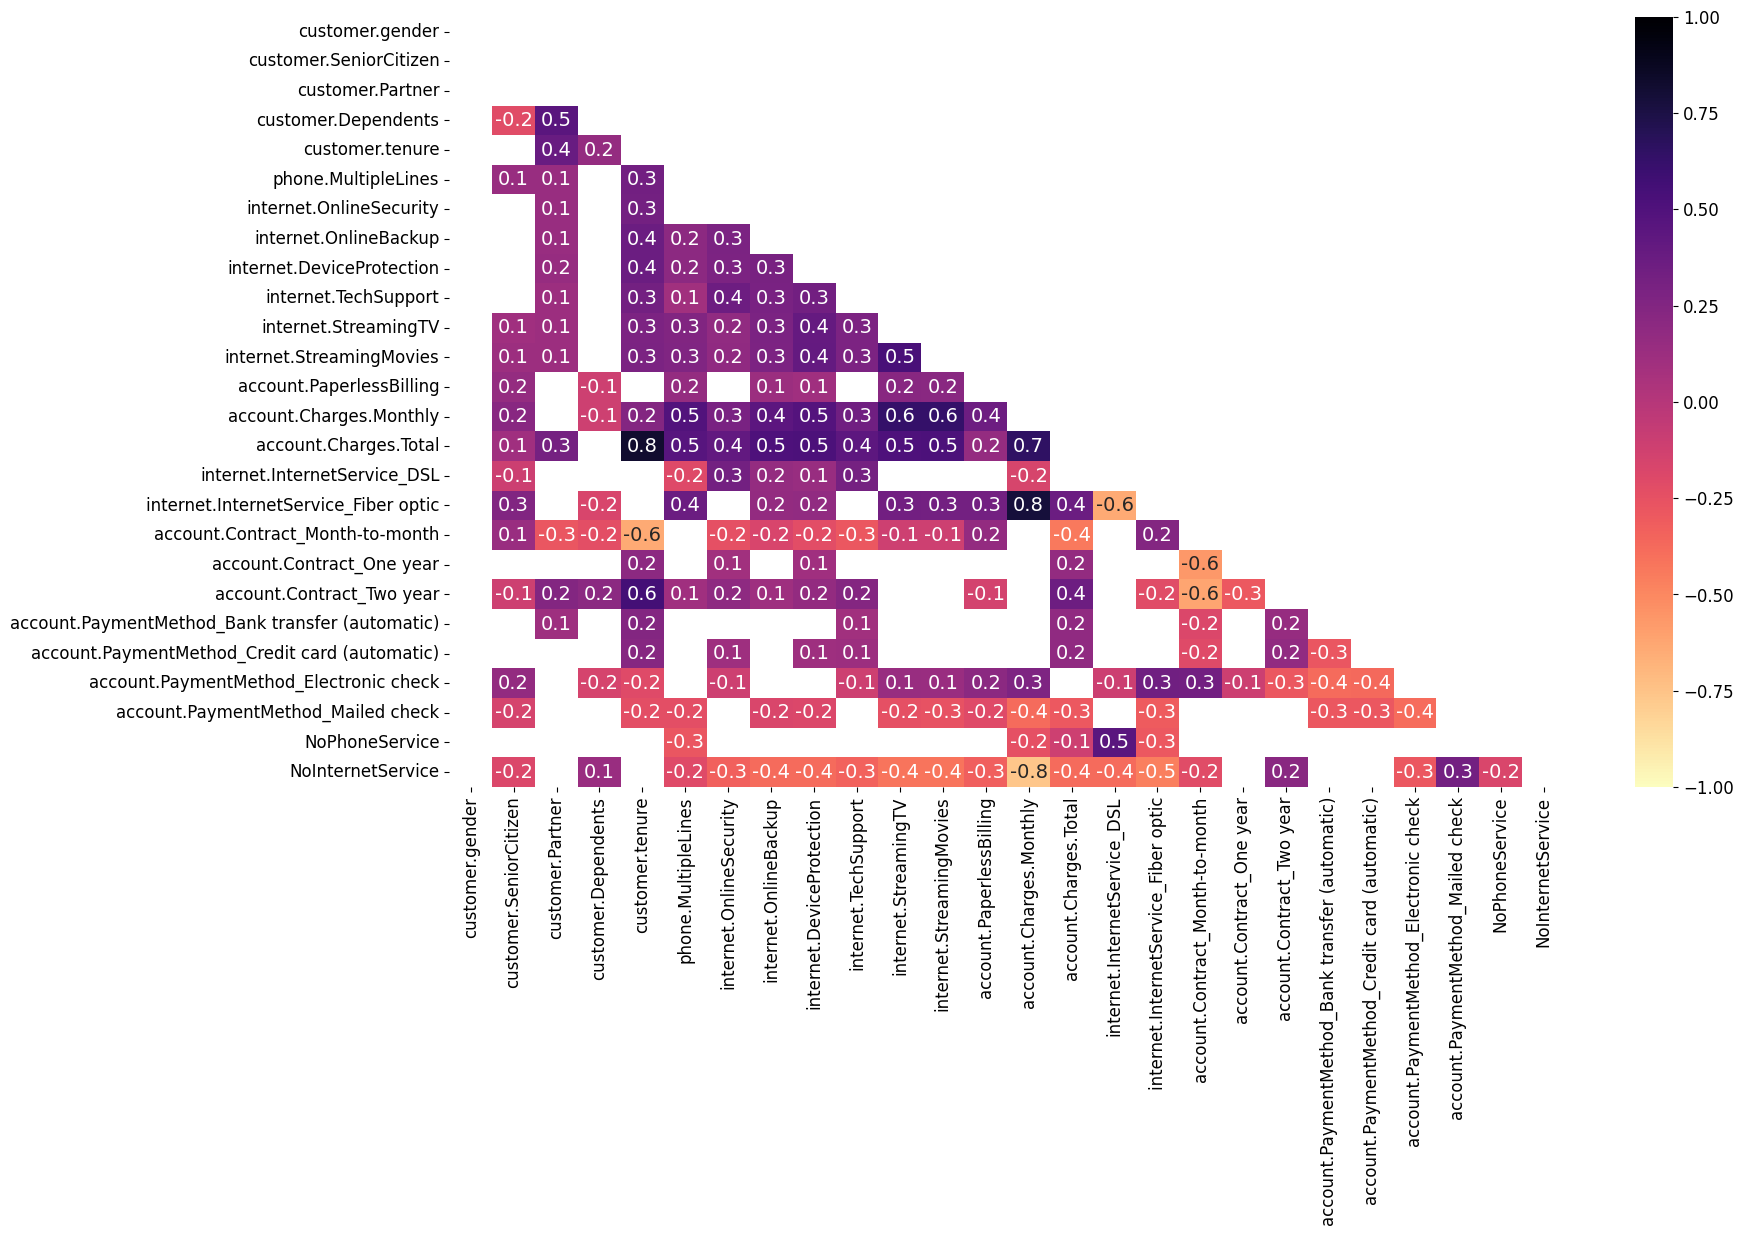

In [ ]:
plt.figure(figsize=(18, 10))

no_churn = dados_notele.drop(columns=['Churn'])
correlation_matrix = no_churn.corr()

threshold = 0.1

zero_mask = np.abs(correlation_matrix) < threshold
upper_triangle_mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
mask = zero_mask | upper_triangle_mask

sns.heatmap(correlation_matrix, cmap='magma_r', mask=mask,
            annot=True, fmt='.1f', vmin=-1, vmax=1)

plt.show()

**Gênero**

O gênero do cliente não tem uma forte correlação com a maioria das outras variáveis. Isso sugere que o gênero não é um fator importante na determinação do comportamento do cliente.

**Clientes seniores**

Os clientes seniores têm algumas correlações notáveis. Eles são menos propensos a ter dependentes e mais propensos a ter múltiplas linhas telefônicas.

**Parceiro e dependentes**

Ter um parceiro e ter dependentes estão positivamente correlacionados. Isso faz sentido, pois ter um parceiro frequentemente implica ter dependentes.

**Tempo de permanência**

O tempo de permanência do cliente está positivamente correlacionado com muitas características relacionadas aos serviços de internet e telefone. Isso sugere que clientes de longo prazo são mais propensos a usar esses serviços.

**Tipo de contrato**

O tipo de contrato é um fator importante na retenção de clientes. Clientes com contratos mensais tendem a cancelar seus serviços com mais frequência do que clientes com contratos de dois anos. Isso ocorre porque contratos mensais são mais flexíveis e, portanto, mais fáceis de cancelar.

**Métodos de pagamento**

Os métodos de pagamento não são um fator importante na retenção de clientes. Os clientes são mais propensos a cancelar seus serviços por outros motivos, como insatisfação com o serviço ou preço.

**NoPhoneService e NoInternetService**

Clientes que não têm um serviço provavelmente não têm o outro. Isso ocorre porque os serviços de telefone e internet geralmente são complementares.

**Recomendações**

Com base nos resultados da análise, as seguintes recomendações podem ser feitas para melhorar a retenção de clientes:

- Oferecer contratos anuais ou bienais para incentivar a fidelidade dos clientes;
- Investir em serviços adicionais para melhorar a experiência do cliente;
- Oferecer opções de pagamento alternativas para atender às necessidades dos clientes;
- Desenvolver um plano de marketing específico para clientes que utilizam fibra ótica;
- Oferecer descontos ou benefícios para clientes com dependentes.

In [ ]:
# Exportando base de dados nova que foi tratada e analisada

# Salve o arquivo CSV

dados_notele.to_csv('C:\\Users\\calen\\area de Trabalho\\novexus_set2023_tratado.csv', index = False)